In [1]:
'''
    Author: A.Shrikant
'''

'\n    Author: A.Shrikant\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## No missing values are there.

## Dropping the 'CustomerID' column because it does not provide useful information for clustering.

In [6]:
df1 = df.drop(columns=['CustomerID'])

In [7]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Label Encoding the 'Gender' column:

In [8]:
df1['Gender'] = df1['Gender'].astype('category').cat.codes

In [9]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Taking only the two important features 'Annual Income (k$)' and 'Spending Score (1-100)':

In [10]:
x = df1.iloc[:, 2:]

In [11]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Feature Scaling:

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Building the K-Means Clustering based model:

**K-Means** is an **Unsupervised** machine learning algorithm which means there are no labels associated with the data points in the dataset. K-Means tries to group data points based on the relative distance b/w the data point and each of the **cluster means/centroids**.

**K-Means/Lloyd's Algorithm:**

$ \text{1. Initialization of the cluster indicator variables(} z^{0}_{i} \text{, } i \in \text{\{1, 2, ..., n\}) associated with each data point.} \\ z^{0}_{i} \text{ represents the cluster indicator variable for the i-th data point in the 0-th iteration.} $

$ \text{For initialization of the indicator variables we can choose either the } \textbf{uniform random sampling} \text{ or the  } \textbf{K-means++} \text{ methods to get the K clusters} \\ \text{centroids/means and then using them, we get the initial cluster indicator values for all the remaining data points.} $

$ \text{2. Compute the clusters means for the t-th iteration i.e. for each cluster k} \in \text{\{1, 2, ..., K\} find:} \\
\displaystyle \large \mu^{t}_{k} = \frac {\sum \limits _{i=1} ^{n} x_{i}\mathbb{1}(z^{t}_{i}=k)} {\sum \limits _{i=1} ^{n} 
\mathbb{1}(z^{t}_{i}=k)} $
$  = \textbf{ mean of cluster k using all datapoints falling in the cluster k in the t-th iteration} $

$\text{3. Re-assignment of values to cluster indicator variables(}z^{t+1}_{i} \text{) for the (t+1)th iteration i.e.} $

$$ \displaystyle \large z^{t+1}_{i} = \arg \min_{k} ||x_i - \mu^{t}_{k}||^2 \text{ } \forall i \in \text{\{1, 2, ..., n\}} $$
$$ \textbf{= Cluster indicator for that cluster whose t-th iteration cluster mean is closest to i-th data point} $$


$ \text{The regions we get after clustering each of which represent a specific cluster are called as } \textbf{Voronoi regions}\text{.} $

$ \textbf{To measure the goodness of partition/clusters we use Silhouette score whose value lie in the range [-1, 1].} $

$ \textbf{Silhouette score} \text{ of } \textbf{-1} \text{ for a data point means that the data point has been put into a } \textbf{wrong cluster and is an outlier} \text{.} \\
\textbf{Silhouette score} \text{ of } \textbf{0} \text{ for a data point means that the data point has been put into a neutral region/point to which atleast two clusters are closest.} \\
\textbf{Silhouette score} \text{ of } \textbf{1} \text{ for a data point means that the data point has been put into the right cluster and is closer to all the data points in its own} \\ \text{ cluster than to any other cluster.} \\
\textbf{Silhouette score} \text{ b/w } \textbf{0 and 1} \text{ for a data point means that the data point has been reasonably well clustered and is closer to most of the data points} \\ \text{ in its own cluster than to any other cluster.} \\
\textbf{Silhouette score} \text{ b/w } \textbf{-1 and 0} \text{ for a data point means that the data point has been wrongly clustered and it is closer to data points in other cluster } \\ \text{than to itself.} $

$ $

In [14]:
from sklearn.cluster import KMeans

In [15]:
k_means = KMeans(n_clusters=4, random_state=123)

In [16]:
k_means.fit(sc_x)

KMeans(n_clusters=4, random_state=123)

In [17]:
k_means.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [18]:
k_means.cluster_centers_

array([[ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536],
       [-0.46948398,  0.2437994 ]])

In [19]:
k_means.inertia_

108.92131661364357

In [20]:
''' Inertia is the Within Cluster Sum of Squared Errors(WCSS). '''
def cal_inertia(datapoints, cluster_centers, labels):
    inertia = 0
    for i in range(len(datapoints)):
        inertia += np.linalg.norm(datapoints[i]-cluster_centers[labels[i]]) ** 2
    return inertia

In [21]:
## For k=4 we calculate the WCSS.
cal_inertia(sc_x, k_means.cluster_centers_, k_means.labels_)

108.92131661364361

In [22]:
wcss = []
for i in range(2,15):
    k_means_model = KMeans(n_clusters=i, random_state=123)
    k_means_model.fit(sc_x);
    wcss.append(k_means_model.inertia_);

In [23]:
wcss

[269.29934286898697,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.235189897502465,
 32.33081392367576,
 29.090568897369717,
 26.462691239784462,
 23.790424143583714,
 21.135534115679146,
 19.22434855262122]

In [24]:
k_values = np.arange(2,15)

In [25]:
len(wcss)

13

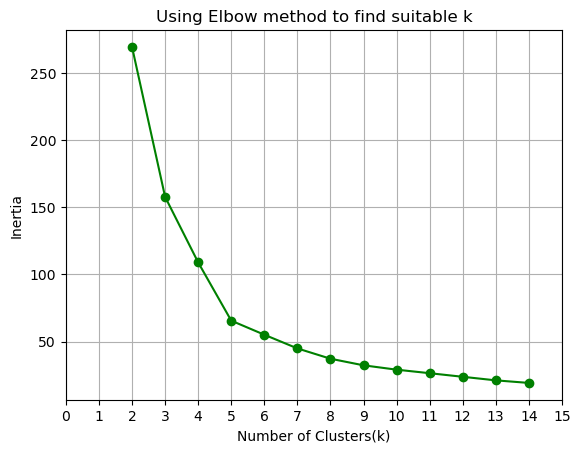

In [26]:
plt.plot(k_values, wcss, marker='o', color='g')
         
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia")
plt.title('Using Elbow method to find suitable k')
plt.xticks(np.arange(0,16,1))
         
plt.grid()

## From the Elbow method we find the suitable value for k as 5.

In [27]:
k_means_2 = KMeans(n_clusters=5, random_state=123)

In [28]:
k_means_2.fit(sc_x)

KMeans(n_clusters=5, random_state=123)

In [29]:
k_means_2.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [30]:
k_means_2.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788]])

In [31]:
k_means_2.inertia_

65.56840815571681

In [32]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [33]:
''' Getting the average silhouette score. '''
silhouette_score(sc_x, k_means_2.labels_)

0.5546571631111091

In [34]:
''' Getting the silhouette score for each datapoint. '''
silhouette_scores = silhouette_samples(sc_x, k_means_2.labels_)
silhouette_scores

array([ 0.41124046,  0.69620683,  0.63934069,  0.69604195,  0.38563359,
        0.69748215,  0.64833998,  0.65893138,  0.62927054,  0.66184814,
        0.67709497,  0.62250892,  0.67914947,  0.7183836 ,  0.67989007,
        0.72517377,  0.480728  ,  0.54086604,  0.57771355,  0.63069704,
        0.46089203,  0.67601561,  0.64089467,  0.67033897,  0.66074953,
        0.70471845,  0.48567333,  0.29331369,  0.4925691 ,  0.6846275 ,
        0.60601978,  0.61174317,  0.57727428,  0.61836077,  0.6096252 ,
        0.64028425,  0.58637068,  0.52937454,  0.42191998,  0.48596674,
        0.09076309,  0.54813337, -0.01212476,  0.12114123,  0.3126116 ,
        0.04964594,  0.39355123,  0.43860327,  0.29680812,  0.29680812,
        0.52456542,  0.3036705 ,  0.51899981,  0.34289529,  0.49331338,
        0.37566018,  0.60191899,  0.54434561,  0.64121219,  0.59585853,
        0.55956233,  0.58127935,  0.65113096,  0.50415135,  0.6798204 ,
        0.52847598,  0.6854379 ,  0.66721797,  0.52847598,  0.65

In [35]:
silhouette_scores.mean()

0.5546571631111091

In [36]:
x_min, x_max = sc_x[:, 0].min()-1, sc_x[:, 0].max()+1
y_min, y_max = sc_x[:, 1].min()-1, sc_x[:, 1].max()+1

In [37]:
x_min

-2.7389991930659487

In [38]:
x_max

3.9176711658902788

In [39]:
y_min

-2.910020787007329

In [40]:
y_max

2.8944921627227167

In [41]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [42]:
xx

array([[-2.73899919, -2.72899919, -2.71899919, ...,  3.89100081,
         3.90100081,  3.91100081],
       [-2.73899919, -2.72899919, -2.71899919, ...,  3.89100081,
         3.90100081,  3.91100081],
       [-2.73899919, -2.72899919, -2.71899919, ...,  3.89100081,
         3.90100081,  3.91100081],
       ...,
       [-2.73899919, -2.72899919, -2.71899919, ...,  3.89100081,
         3.90100081,  3.91100081],
       [-2.73899919, -2.72899919, -2.71899919, ...,  3.89100081,
         3.90100081,  3.91100081],
       [-2.73899919, -2.72899919, -2.71899919, ...,  3.89100081,
         3.90100081,  3.91100081]])

In [43]:
yy

array([[-2.91002079, -2.91002079, -2.91002079, ..., -2.91002079,
        -2.91002079, -2.91002079],
       [-2.90002079, -2.90002079, -2.90002079, ..., -2.90002079,
        -2.90002079, -2.90002079],
       [-2.89002079, -2.89002079, -2.89002079, ..., -2.89002079,
        -2.89002079, -2.89002079],
       ...,
       [ 2.86997921,  2.86997921,  2.86997921, ...,  2.86997921,
         2.86997921,  2.86997921],
       [ 2.87997921,  2.87997921,  2.87997921, ...,  2.87997921,
         2.87997921,  2.87997921],
       [ 2.88997921,  2.88997921,  2.88997921, ...,  2.88997921,
         2.88997921,  2.88997921]])

In [44]:
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[-2.73899919, -2.91002079],
       [-2.72899919, -2.91002079],
       [-2.71899919, -2.91002079],
       ...,
       [ 3.89100081,  2.88997921],
       [ 3.90100081,  2.88997921],
       [ 3.91100081,  2.88997921]])

In [45]:
len(points)

386946

In [46]:
''' Finding and storing the cluster indicator values for each point in 'points' array. '''

z = []
k = len(k_means_2.cluster_centers_)
for i in range(len(points)):
    cluster_indicator = 0
    old_distance = np.linalg.norm(points[i]-k_means_2.cluster_centers_[0])
    for j in range(1,k):
        new_distance = np.linalg.norm(points[i]-k_means_2.cluster_centers_[j])
        if new_distance < old_distance:
            cluster_indicator = j
            old_distance = new_distance
    z.append(cluster_indicator)

In [47]:
np.array(z)

array([3, 3, 3, ..., 1, 1, 1])

In [48]:
len(z)

386946

In [49]:
zz = np.array(z).reshape(xx.shape)

In [50]:
zz.shape

(581, 666)

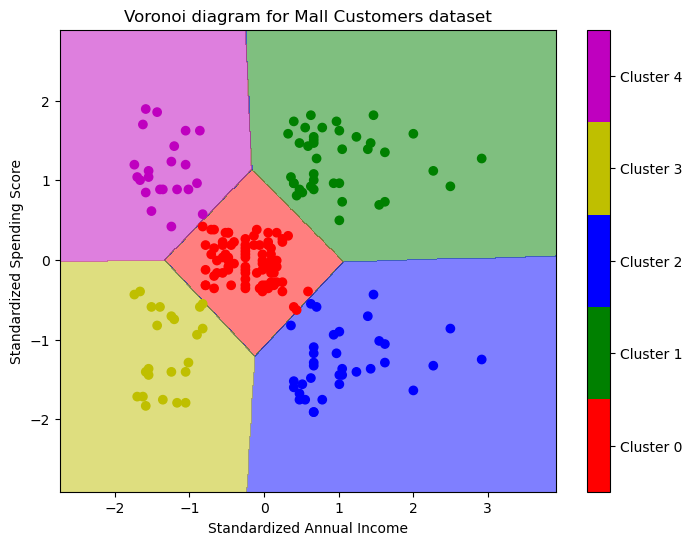

In [51]:
plt.figure(figsize=(8,6))

''' Giving colors to the Voronoi regions that we get as a result of K-Means Clustering. '''
voronoi_region_colors = ['r', 'g', 'b', 'y', 'm']

cmap = matplotlib.colors.ListedColormap(voronoi_region_colors)
cluster_indicator_labels = ["Cluster " + str(i) for i in range(k)]

''' Plotting the Voronoi regions using the cluster indicator values for the points in 'points' array. '''
plt.contourf(xx, yy, zz, alpha=0.5, levels=5, cmap=cmap)

''' Plotting the clustering result using the cluster indicator values for the points in array sc_x(containing the 
'Standardized Annual Income' and 'Standardized Spending Score'). '''
plt.scatter(sc_x[:, 0:-1], sc_x[:, 1:], c = k_means_2.labels_, cmap=cmap)

plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.title('Voronoi diagram for Mall Customers dataset')

cbar = plt.colorbar()

# Calculating the location for the ticks that will appear in cbar.
loc = np.arange(0.4, 4.4, 4/5)

# cbar.set_ticks() sets the ticks/markers on the axes.
cbar.set_ticks(loc)

# cbar.set_ticklabels() sets the tick labels for the ticks.
cbar.set_ticklabels(cluster_indicator_labels)

plt.show()

In [52]:
df['Cluster Indicator'] = k_means_2.labels_

In [53]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Indicator
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [54]:
''' Exporting the dataframe df containing the clustering result as a csv file so that it can be used for further downstream 
processes like identifying the characteristics related to each cluster which will help in gaining insights regarding the basis
for customer segmentation. '''
df.to_csv('mall_customer_clustered.csv')

## Conclusion:

On the **Mall Customers dataset**, we selected only two features **Annual Income (k$)** and **Spending Score (1-100)** for two reasons:
- To visualize the clusters in the data.
- These two features are the most important features among the 4 input features.

After applying the **K-Means algorithm** to the **Mall Customers dataset** we get the following observations:
- **Cluster 0**(red region) contains the customers who have moderate Annual Income and moderate Spending Score.
- **Cluster 1**(green region) contains the customers who have high Annual Income and high Spending Score.
- **Cluster 2**(blue region) contains the customers who have high Annual Income and low Spending Score.
- **Cluster 3**(yellow region) contains the customers who have low Annual Income and low Spending Score.
- **Cluster 4**(magenta region) contains the customers who have low Annual Income and high Spending Score.

**The average Silhouette score** for the **K-Means clustering** with **K=5** has come out as: **0.5547** which means that all the data points in the dataset have been reasonably well clustered.